<a href="https://colab.research.google.com/github/XeyaleVeliyeva/Machine-learning/blob/main/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
customer = pd.read_csv("/content/Train.csv");
customer.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [ ]:
customer.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [ ]:
customer.isna().sum()

,0
ID,0
Gender,0
Ever_Married,140
Age,0
Graduated,78
Profession,124
Work_Experience,829
Spending_Score,0
Family_Size,335
Var_1,76


In [ ]:
customer = customer.drop(["ID",'Var_1'],axis=1)

In [ ]:
prof = customer.groupby('Profession')['Segmentation'].value_counts()
prof

Profession     Segmentation
Artist         C               1065
               B                756
               A                558
               D                137
Doctor         D                206
               A                199
               B                143
               C                140
Engineer       A                259
               B                189
               D                176
               C                 75
Entertainment  A                365
               B                221
               D                215
               C                148
Executive      B                183
               C                175
               A                125
               D                116
Healthcare     D                979
               C                146
               A                106
               B                101
Homemaker      D                 90
               A                 73
               B                 55
               C                 28
Lawyer         A                197
               B                158
               C                140
               D                128
Marketing      D                170
               A                 57
               C                 35
               B                 30
Name: count, dtype: int64

In [ ]:
spend = customer.groupby('Spending_Score')['Segmentation'].value_counts()
spend

Spending_Score  Segmentation
Average         C                903
                B                590
                A                343
                D                138
High            C                405
                B                384
                A                271
                D                156
Low             D               1974
                A               1358
                B                884
                C                662
Name: count, dtype: int64

In [ ]:
grad = customer.groupby('Graduated')['Segmentation'].value_counts()
grad

Graduated  Segmentation
No         D               1437
           A                729
           B                508
           C                348
Yes        C               1607
           B               1332
           A               1219
           D                810
Name: count, dtype: int64

In [ ]:
work = customer.groupby('Segmentation')['Work_Experience'].value_counts()
work

Segmentation  Work_Experience
A             1.0                578
              0.0                542
              9.0                138
              8.0                121
              2.0                 63
              3.0                 58
              4.0                 52
              7.0                 52
              5.0                 50
              6.0                 49
              12.0                19
              11.0                16
              14.0                16
              13.0                13
              10.0                11
B             1.0                571
              0.0                558
              9.0                 93
              8.0                 81
              4.0                 67
              2.0                 60
              3.0                 60
              6.0                 45
              5.0                 44
              7.0                 39
              12.0                12
              13.0                12
              10.0                10
              11.0                 7
              14.0                 7
C             1.0                628
              0.0                619
              8.0                 97
              9.0                 89
              2.0                 77
              4.0                 68
              3.0                 63
              7.0                 52
              6.0                 47
              5.0                 41
              11.0                11
              10.0                 8
              13.0                 7
              12.0                 4
              14.0                 4
D             0.0                599
              1.0                577
              8.0                164
              9.0                154
              2.0                 86
              3.0                 74
              4.0                 66
              6.0                 63
              5.0                 59
              7.0                 53
              10.0                24
              14.0                18
              11.0                16
              13.0                14
              12.0                13
Name: count, dtype: int64

In [ ]:
count = len(customer["Profession"].unique())
unique = customer["Profession"].unique()
count,unique

(10,
 array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
        'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object))

In [ ]:
count = len(customer["Spending_Score"].unique())
unique = customer["Spending_Score"].unique()
count,unique

(3, array(['Low', 'Average', 'High'], dtype=object))

In [ ]:
from collections import Counter
def detect_outliers(df, features):
  outlier_indices = []

  for c in features:
    Q1 = np.percentile(customer[c], 25)
    Q3 = np.percentile(customer[c], 75)
    IQR = Q3 - Q1
    outlier_step = IQR * 1.5
    outlier_list_col = customer[(customer[c] < Q1 - outlier_step) | (customer[c] > Q3 + outlier_step)].index
    outlier_indices.extend(outlier_list_col)

  outlier_indices = Counter(outlier_indices)
  multiple_outliers = list(i for i, v in outlier_indices.items() if v >2)

  return multiple_outliers

In [ ]:
customer.loc[detect_outliers(customer, ['Age', 'Family_Size', 'Work_Experience'])]

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation


In [ ]:
customer['Ever_Married'] = customer['Ever_Married'].map({'No': 0, 'Yes': 1})
customer['Graduated'] = customer['Graduated'].map({'No': 0, 'Yes': 1})


In [ ]:
customer['Gender'] = customer['Gender'].map({'Male': 0, 'Female': 1})


In [ ]:
customer

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,0,0.0,22,0.0,Healthcare,1.0,Low,4.0,D
1,1,1.0,38,1.0,Engineer,NaN,Average,3.0,A
2,1,1.0,67,1.0,Engineer,1.0,Low,1.0,B
3,0,1.0,67,1.0,Lawyer,0.0,High,2.0,B
4,1,1.0,40,1.0,Entertainment,NaN,High,6.0,A
...,...,...,...,...,...,...,...,...,...
8063,0,0.0,22,0.0,NaN,0.0,Low,7.0,D
8064,0,0.0,35,0.0,Executive,3.0,Low,4.0,D
8065,1,0.0,33,1.0,Healthcare,1.0,Low,1.0,D
8066,1,0.0,27,1.0,Healthcare,1.0,Low,4.0,B


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
customer['Segmentation'] = label_encoder.fit_transform(customer['Segmentation'])


In [ ]:
customer[['Profession','Spending_Score']].fillna(customer[['Profession','Spending_Score']].mode(), inplace = True)

<ipython-input-18-33269e18990b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer[['Profession','Spending_Score']].fillna(customer[['Profession','Spending_Score']].mode(), inplace = True)


In [ ]:
customer = pd.get_dummies(customer, columns=['Profession','Spending_Score'])

In [ ]:
customer

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,0,0.0,22,0.0,1.0,4.0,3,False,False,False,False,False,True,False,False,False,False,False,True
1,1,1.0,38,1.0,NaN,3.0,0,False,False,True,False,False,False,False,False,False,True,False,False
2,1,1.0,67,1.0,1.0,1.0,1,False,False,True,False,False,False,False,False,False,False,False,True
3,0,1.0,67,1.0,0.0,2.0,1,False,False,False,False,False,False,False,True,False,False,True,False
4,1,1.0,40,1.0,NaN,6.0,0,False,False,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,0,0.0,22,0.0,0.0,7.0,3,False,False,False,False,False,False,False,False,False,False,False,True
8064,0,0.0,35,0.0,3.0,4.0,3,False,False,False,False,True,False,False,False,False,False,False,True
8065,1,0.0,33,1.0,1.0,1.0,3,False,False,False,False,False,True,False,False,False,False,False,True
8066,1,0.0,27,1.0,1.0,4.0,1,False,False,False,False,False,True,False,False,False,False,False,True


In [ ]:
from sklearn.impute import KNNImputer
df=customer.select_dtypes(exclude='object')
imputer = KNNImputer(n_neighbors=3)
df_imputer = imputer.fit_transform(df)
df_imputer.shape

(8068, 19)

In [ ]:
customer = pd.DataFrame(df_imputer, columns = df.columns)
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    8068 non-null   float64
 1   Ever_Married              8068 non-null   float64
 2   Age                       8068 non-null   float64
 3   Graduated                 8068 non-null   float64
 4   Work_Experience           8068 non-null   float64
 5   Family_Size               8068 non-null   float64
 6   Segmentation              8068 non-null   float64
 7   Profession_Artist         8068 non-null   float64
 8   Profession_Doctor         8068 non-null   float64
 9   Profession_Engineer       8068 non-null   float64
 10  Profession_Entertainment  8068 non-null   float64
 11  Profession_Executive      8068 non-null   float64
 12  Profession_Healthcare     8068 non-null   float64
 13  Profession_Homemaker      8068 non-null   float64
 14  Professi

In [ ]:
customer.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,0.0,0.0,22.0,0.0,1.000000,4.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,38.0,1.0,5.666667,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,67.0,1.0,1.000000,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,67.0,1.0,0.000000,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,1.0,40.0,1.0,5.666667,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
customer.isna().sum()

,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Work_Experience,0
Family_Size,0
Segmentation,0
Profession_Artist,0
Profession_Doctor,0
Profession_Engineer,0


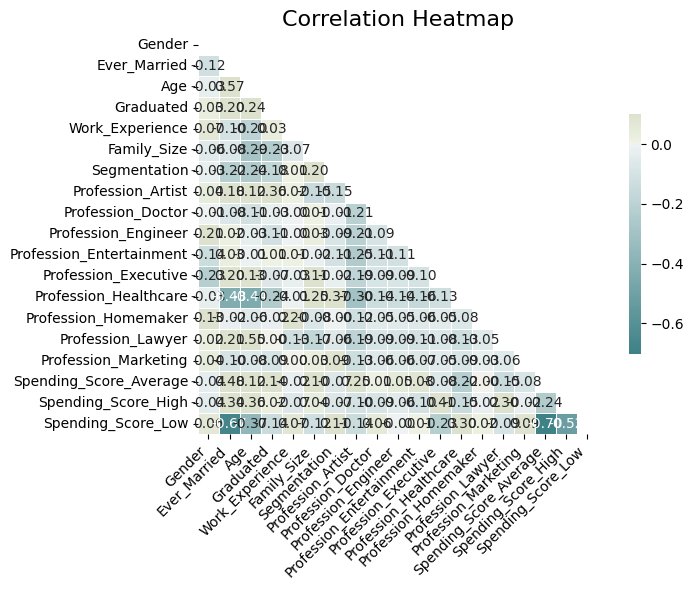

In [ ]:
corr = customer.corr()
cmap = sns.diverging_palette(200, 100, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(8, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.1, center=0, annot=True,
            fmt=".2f", square=True, linewidths=0.5, cbar_kws={"shrink": 0.6})

ax.set_title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
corr_matrix = customer.corr()
corr_matrix

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
Gender,1.000000,-0.116949,-0.030216,0.032697,0.066604,-0.055212,-0.026403,0.040014,-0.006544,0.214829,-0.136387,-0.227074,-0.030698,0.132781,0.023391,0.042481,-0.036083,-0.041952,0.062424
Ever_Married,-0.116949,1.000000,0.570553,0.197746,-0.101578,-0.078547,-0.221228,0.177323,-0.078058,0.015839,0.025177,0.202233,-0.428591,-0.021217,0.206139,-0.095812,0.478895,0.344359,-0.673047
Age,-0.030216,0.570553,1.000000,0.238279,-0.199967,-0.286876,-0.243552,0.115237,-0.114043,-0.031729,-0.010086,0.129303,-0.442792,-0.058837,0.549588,-0.077097,0.115847,0.360754,-0.365837
Graduated,0.032697,0.197746,0.238279,1.000000,0.034500,-0.233777,-0.179519,0.364163,-0.026533,-0.111482,0.007305,-0.067365,-0.240903,-0.020694,0.001087,-0.088888,0.141294,0.021892,-0.140251
Work_Experience,0.066604,-0.101578,-0.199967,0.034500,1.000000,-0.066694,0.008866,0.017261,-0.001281,-0.001864,0.009693,-0.027105,-0.008979,0.198578,-0.125740,0.001107,-0.020084,-0.071382,0.069892
Family_Size,-0.055212,-0.078547,-0.286876,-0.233777,-0.066694,1.000000,0.199667,-0.148407,0.008057,0.027542,-0.015970,0.106129,0.248193,-0.079081,-0.174561,0.028629,0.100076,0.040693,-0.117767
Segmentation,-0.026403,-0.221228,-0.243552,-0.179519,0.008866,0.199667,1.000000,-0.148684,-0.013107,-0.086973,-0.108199,-0.022673,0.366234,-0.002054,-0.061604,0.089675,-0.069193,-0.072198,0.113668
Profession_Artist,0.040014,0.177323,0.115237,0.364163,0.017261,-0.148407,-0.148684,1.000000,-0.205540,-0.207331,-0.245784,-0.190639,-0.299352,-0.119382,-0.194734,-0.130450,0.246098,-0.102611,-0.141295
Profession_Doctor,-0.006544,-0.078058,-0.114043,-0.026533,-0.001281,0.008057,-0.013107,-0.205540,1.000000,-0.094037,-0.111478,-0.086467,-0.135774,-0.054147,-0.088324,-0.059167,0.008947,-0.090172,0.058116
Profession_Engineer,0.214829,0.015839,-0.031729,-0.111482,-0.001864,0.027542,-0.086973,-0.207331,-0.094037,1.000000,-0.112450,-0.087220,-0.136957,-0.054619,-0.089093,-0.059683,0.051222,-0.055853,-0.004166


In [ ]:
X = customer.drop("Segmentation",axis=1)

In [ ]:
y = customer["Segmentation"].copy()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [ ]:
import xgboost as xgb
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
xgb_model = xgb.XGBClassifier(n_estimators = 50, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_f1_score = f1_score(y_test, xgb_predictions,average='weighted')
print(f"XGBoost Accuracy: {xgb_accuracy}")
print(f"XGBoost F1 score: {xgb_f1_score}")

XGBoost Accuracy: 0.5371747211895911
XGBoost F1 score: 0.5318199429363611


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters found: {grid_search.best_params_}")


Best parameters found: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}


In [ ]:
grid_search.score(X_test, y_test)


0.530359355638166